In [ ]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [ ]:
grid_res=read.csv('../data/wg20220316/common_variants_chr18-23_grid_opt.csv')

In [ ]:
grid_res$CHR=as.integer(substr(grid_res$CHR, 4, nchar(grid_res$CHR)))

In [ ]:
nrow(grid_res[grid_res$LOD>3.3,])

[1] 4893

In [ ]:
nrow(grid_res)

[1] 620179

In [ ]:
4893/620179

[1] 0.007889658

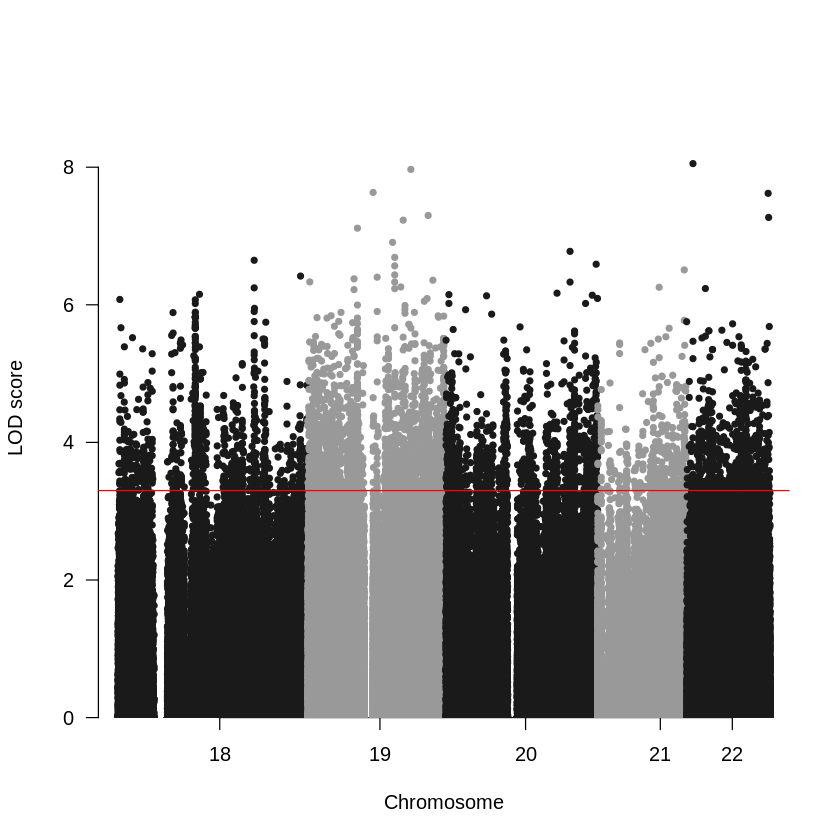

In [ ]:
manhattan(grid_res, chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

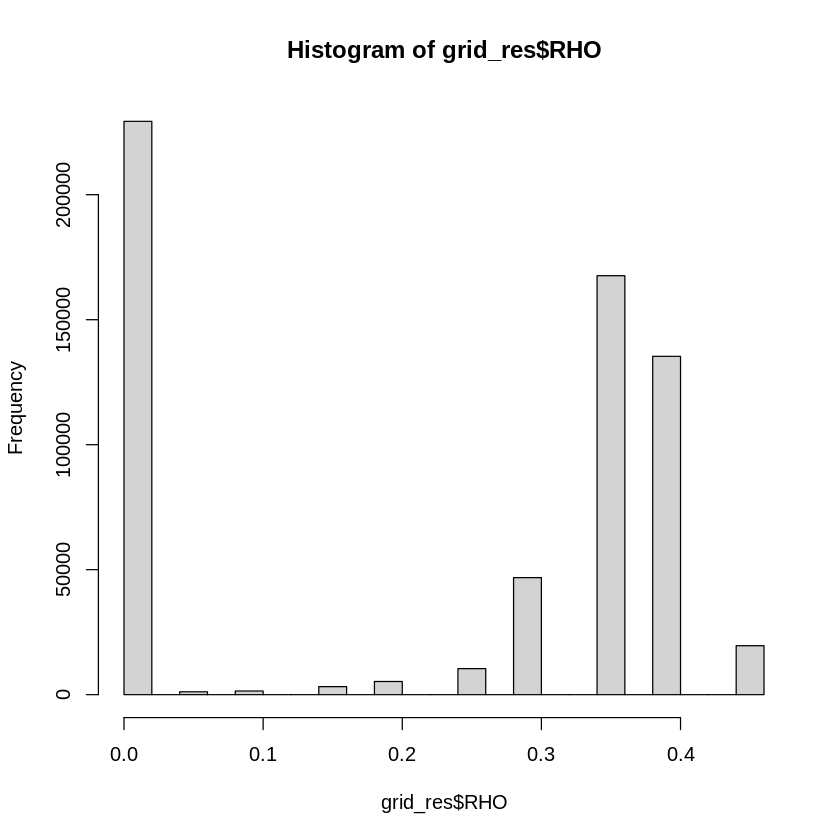

In [ ]:
hist(grid_res$RHO)

In [ ]:
sum(grid_res$RHO<0.1)

[1] 230489

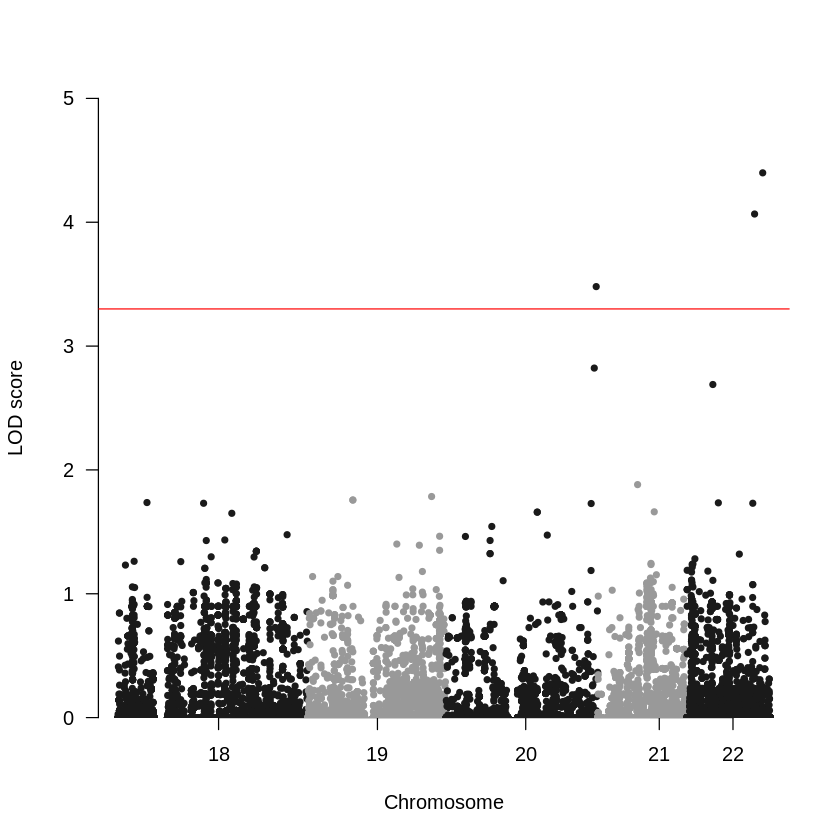

In [ ]:
manhattan(grid_res[grid_res$RHO<0.1,], chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

In [ ]:
grid_res[grid_res$RHO<0.1 & grid_res$LOD>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
444057,20,63571534,A,G,chr20:63571534:A:G,3.480287,0.05
602371,22,44263080,T,TTTCTTTC,chr22:44263080:T:TTTCTTTC,4.066467,0.05
611181,22,47697736,A,C,chr22:47697736:A:C,4.398866,0.05


### LOD vs HLOD

In [ ]:
grid_chr22=grid_res[grid_res$CHR==22,]
grid_chr22=grid_chr22[!duplicated(grid_chr22$SNP),]
row.names(grid_chr22)=grid_chr22$SNP

In [ ]:
sum(grid_chr22$LOD>3.3)

[1] 687

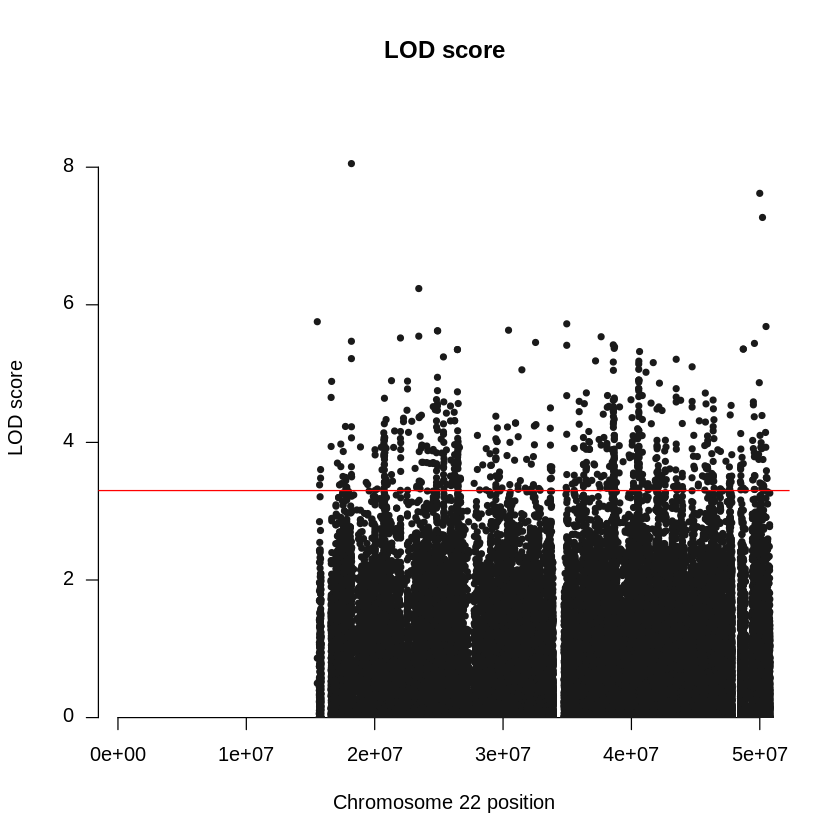

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main="LOD score")

In [ ]:
hlod_res=read.csv('../data/wg20220316/common_variants_chr22_besthlod.csv',header = FALSE,row.names = 1)
colnames(hlod_res)=c('Theta','Alpha','HLOD')
variants=row.names(hlod_res)
row.names(hlod_res)=substr(variants,0, nchar(variants)-3)

In [ ]:
hlod_res=cbind(grid_chr22[row.names(hlod_res),1:5],hlod_res)

In [ ]:
sum(hlod_res$HLOD>3.3)

[1] 823

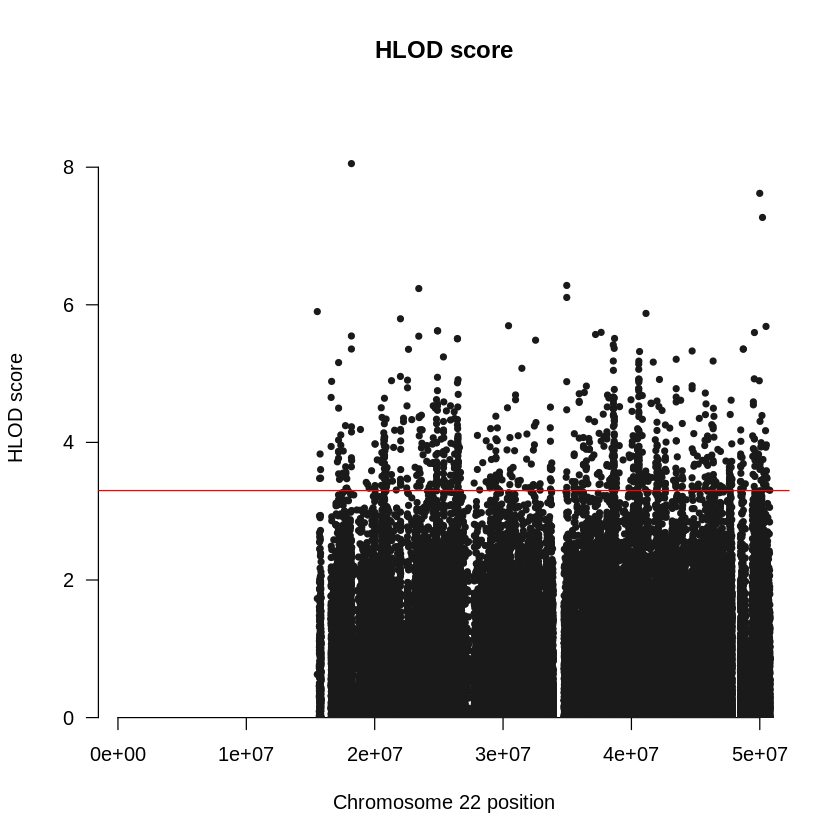

In [ ]:
manhattan(hlod_res, chr="CHR", bp="POS", snp="SNP", p="HLOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "HLOD score",main="HLOD score")

### Haplotypes with vs without imputation

In [ ]:
unimp_res=read.csv('../data/wg20220316/common_variants_chr22_unimputed_lods.csv',header = TRUE,row.names = 1)

In [ ]:
imp_res=read.csv('../data/wg20220316/common_variants_chr22_imputed_lods.csv',header = TRUE,row.names = 1)

In [ ]:
grid_chr22=grid_chr22[row.names(hlod_res),]

In [ ]:
grid_chr22$LODimp=apply(imp_res,1,max)

In [ ]:
grid_chr22$LODun=apply(unimp_res,1,max)

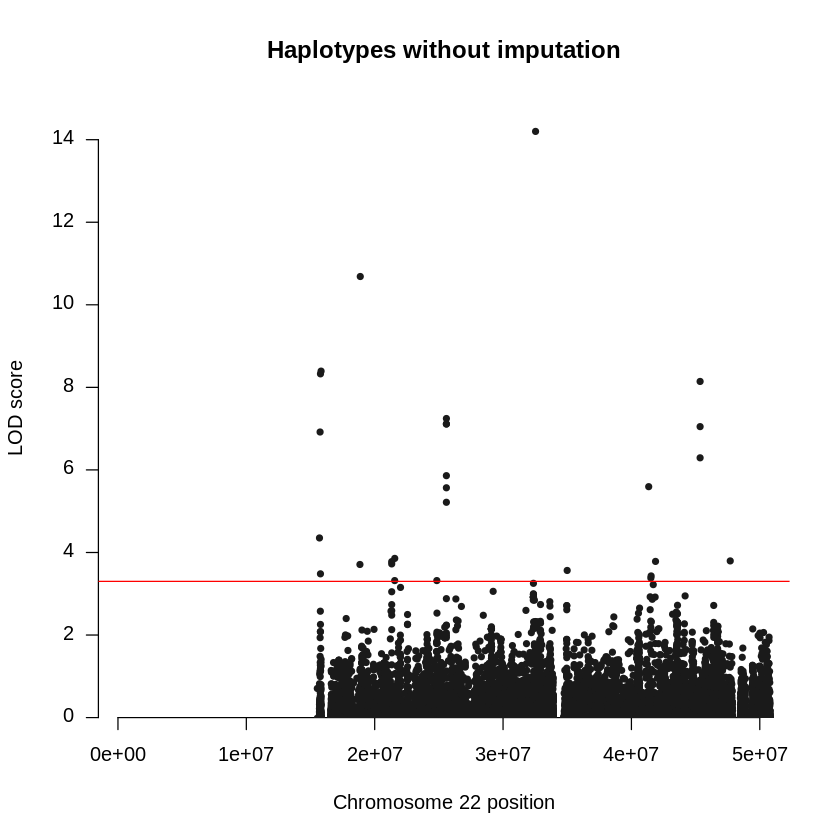

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LODun",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main='Haplotypes without imputation')

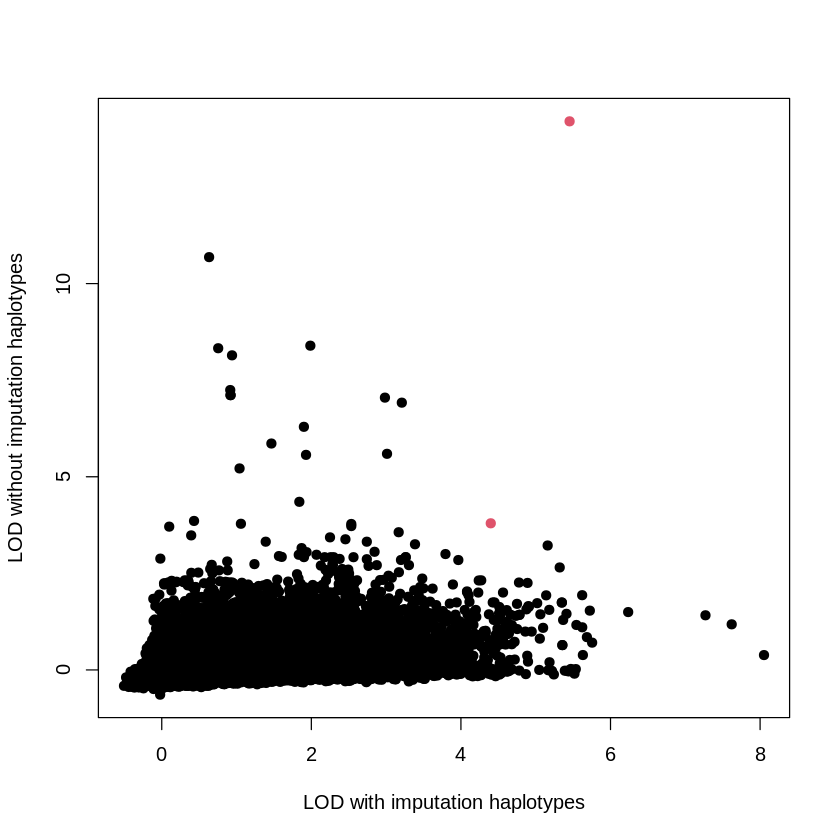

In [ ]:
plot(grid_chr22$LODimp,grid_chr22$LODun,col = as.numeric(grid_chr22$LODimp>3.3 & grid_chr22$LODun>3.3)+1,pch=19,xlab="LOD with imputation haplotypes", ylab="LOD without imputation haplotypes")

In [ ]:
grid_chr22[grid_chr22$LODimp>3.3 & grid_chr22$LODun>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:32532265:G:A,22,32532265,G,A,chr22:32532265:G:A,5.452885,0.20,5.452885,14.200435
chr22:47697736:A:C,22,47697736,A,C,chr22:47697736:A:C,4.398866,0.05,4.398866,3.795548


### HLOD without imputation haplotypes

In [ ]:
hlod_unimp=read.csv('../data/wg20220316/common_variants_chr22_unimp_besthlod.csv',header = FALSE,row.names = 1)
colnames(hlod_unimp)=c('Theta','Alpha','HLOD')

In [ ]:
row.names(hlod_unimp)=substr(variants,0, nchar(variants)-3)

In [ ]:
hlod_unimp=cbind(grid_chr22,hlod_unimp)

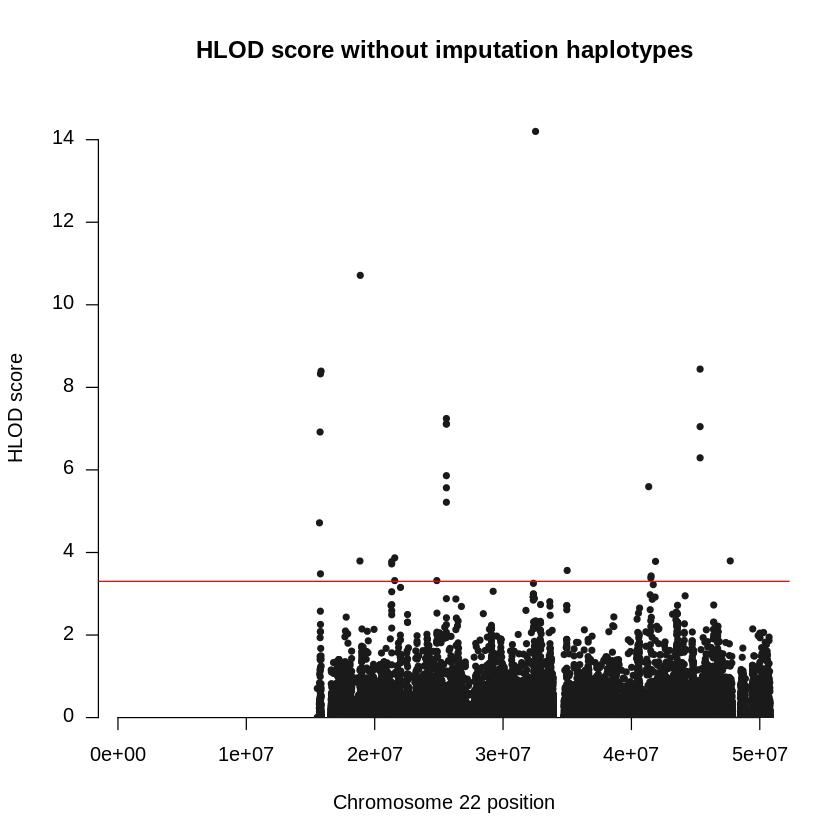

In [ ]:
manhattan(hlod_unimp, chr="CHR", bp="POS", snp="SNP", p="HLOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "HLOD score",main="HLOD score without imputation haplotypes")

In [ ]:
sum(hlod_unimp$HLOD>3.3)

[1] 28

In [ ]:
sum(hlod_unimp$LODun>3.3)

[1] 28

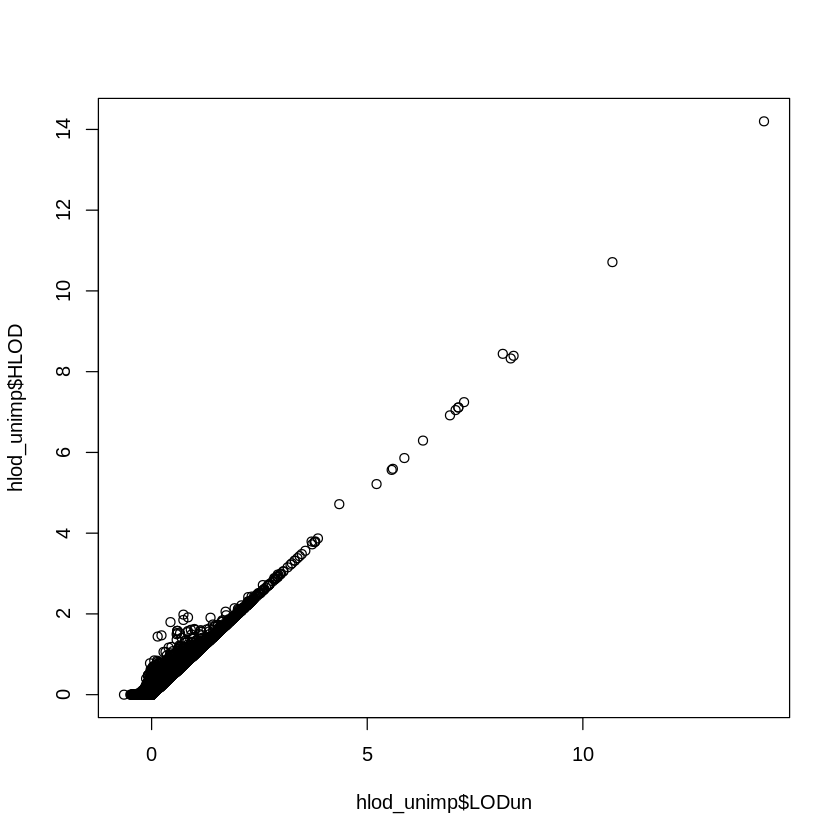

In [ ]:
plot(hlod_unimp$LODun,hlod_unimp$HLOD)

In [ ]:
hlod_unimp[hlod_unimp$HLOD>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun,Theta,Alpha,HLOD
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr22:15698895:C:A,22,15698895,C,A,chr22:15698895:C:A,1.83943716,0.30,1.83943716,4.351754,LOD0.0,0.6503491,4.718445
chr22:15746033:T:C,22,15746033,T,C,chr22:15746033:T:C,3.20969498,0.25,3.20969498,6.918465,LOD0.1,1.0000000,6.918465
chr22:15774734:T:G,22,15774734,T,G,chr22:15774734:T:G,0.39351108,0.35,0.39351108,3.482726,LOD0.15,1.0000000,3.482726
chr22:15775793:G:A,22,15775793,G,A,chr22:15775793:G:A,0.75465403,0.30,0.75465403,8.327158,LOD0.05,1.0000000,8.327158
chr22:15823448:G:A,22,15823448,G,A,chr22:15823448:G:A,1.98680637,0.30,1.98680637,8.393338,LOD0.05,1.0000000,8.393338
chr22:18850435:C:T,22,18850435,C,T,chr22:18850435:C:T,0.09979611,0.35,0.09979611,3.709249,LOD0.1,0.7811039,3.793151
chr22:18876007:T:G,22,18876007,T,G,chr22:18876007:T:G,0.63322765,0.30,0.63322765,10.685351,LOD0.0,0.9605784,10.713316
chr22:21326399:A:G,22,21326399,A,G,chr22:21326399:A:G,2.53408107,0.30,2.53408107,3.723100,LOD0.2,1.0000000,3.723100
chr22:21326400:A:T,22,21326400,A,T,chr22:21326400:A:T,2.53408107,0.30,2.53408107,3.778138,LOD0.2,1.0000000,3.778138


### LOD without imputation haplotypes (plug-in afreq)

In [ ]:
unimp_res1=read.csv('../data/wg20220316/common_variants_chr22_unimputed_lods_afreq.csv',header = TRUE,row.names = 1)

In [ ]:
variants=row.names(unimp_res1)
row.names(unimp_res1)=substr(variants,0, nchar(variants)-3)

In [ ]:
head(unimp_res1)

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15528179:G:T,-33.27534,-20.84448,-13.47098,-8.450897,-4.996025,-2.704249,-1.2945309,-0.5268439,-0.1793950,-0.05367149
chr22:15528424:T:C,-56.58866,-39.19668,-27.36517,-18.689514,-12.289069,-7.647198,-4.3969353,-2.2397285,-0.9178479,-0.21865197
chr22:15528913:C:T,-62.35390,-32.58352,-19.16686,-10.877403,-5.580128,-2.333573,-0.5637205,0.1711362,0.2683654,0.10471217
chr22:15690112:C:T,-53.04289,-30.94843,-20.28023,-13.342486,-8.547326,-5.220080,-2.9727988,-1.5298197,-0.6680633,-0.20284353
chr22:15690174:G:C,-73.83822,-43.82755,-29.20080,-19.625714,-12.941206,-8.207137,-4.8907481,-2.6368594,-1.1859595,-0.34773768
chr22:15690808:C:A,-68.48792,-41.02980,-27.02262,-17.841708,-11.469892,-7.026469,-4.0037331,-2.0464937,-0.8728466,-0.24893569


In [ ]:
grid_chr22=grid_chr22[row.names(unimp_res1),]

In [ ]:
grid_chr22$LODimpafreq=apply(unimp_res1,1,max)

In [ ]:
sum(grid_chr22$LODimpafreq>3.3)

[1] 1213

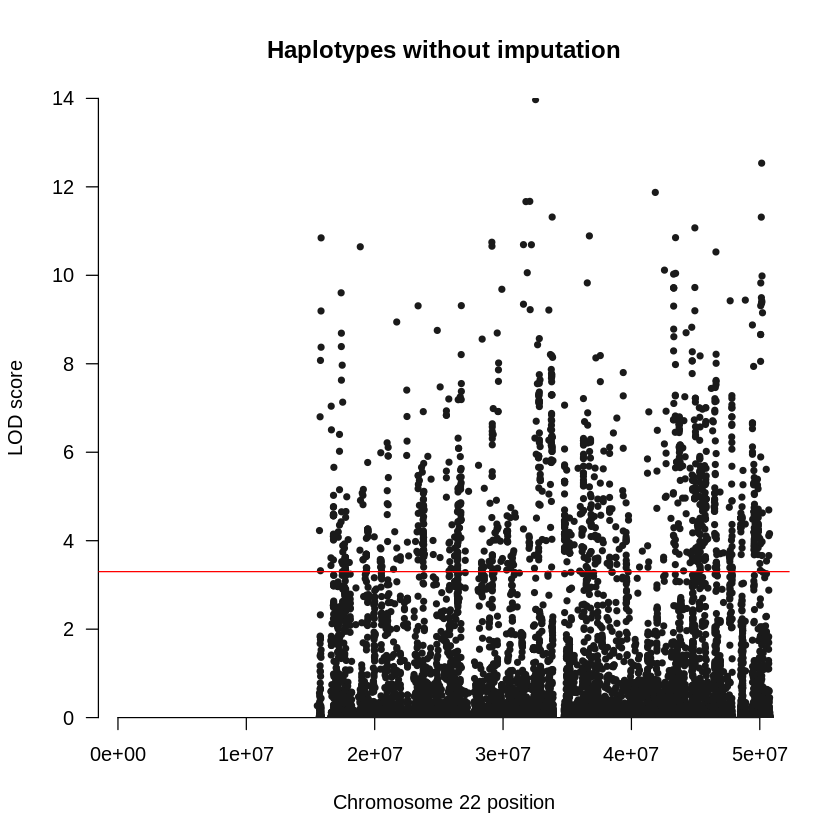

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LODimpafreq",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main='Haplotypes without imputation')

In [ ]:
unimp_res1

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15528179:G:T_A0,-33.275335,-20.844476,-13.470983,-8.450897,-4.996025,-2.7042492,-1.2945309,-0.5268439,-0.17939499,-0.053671491
chr22:15528424:T:C_A0,-56.588664,-39.196679,-27.365174,-18.689514,-12.289069,-7.6471983,-4.3969353,-2.2397285,-0.91784792,-0.218651973
chr22:15528913:C:T_A0,-62.353896,-32.583519,-19.166863,-10.877403,-5.580128,-2.3335731,-0.5637205,0.1711362,0.26836536,0.104712174
chr22:15690112:C:T_A0,-53.042894,-30.948430,-20.280225,-13.342486,-8.547326,-5.2200795,-2.9727988,-1.5298197,-0.66806328,-0.202843526
chr22:15690174:G:C_A0,-73.838222,-43.827552,-29.200799,-19.625714,-12.941206,-8.2071374,-4.8907481,-2.6368594,-1.18595948,-0.347737680
chr22:15690808:C:A_A0,-68.487920,-41.029801,-27.022623,-17.841708,-11.469892,-7.0264688,-4.0037331,-2.0464937,-0.87284659,-0.248935691
chr22:15691121:A:G_A0,-81.157328,-42.452149,-25.881662,-15.819512,-9.291804,-5.0697328,-2.4628993,-0.9945906,-0.28785542,-0.031394904
chr22:15691154:C:A_A0,-8.425517,-4.976121,-3.138526,-1.932742,-1.126551,-0.6043295,-0.2881854,-0.1163630,-0.03671431,-0.007073078
chr22:15691320:G:A_A0,-45.536067,-29.592919,-19.788817,-12.953988,-8.114309,-4.7484031,-2.5077890,-1.1256403,-0.38031271,-0.071787028
